# TASK  - CUISINE CLASSIFICATION
### Objective :
To develop a machine learning model to classify restaurants based on their cuisines.

### Steps:
- Preprocess the dataset by handling missing values and encoding categorical variables. 
- Split the data into training and testing sets.
- Select a classification algorithm (e.g., logistic regression, random forest) and train it on the training data.
- Evaluate the model's performance using appropriate classification metrics (e.g., accuracy, precision, recall) on the testing data.
- Analyze the model's performance across different cuisines and identify any challenges or biases

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                     
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
resdf = pd.read_csv('Dataset .csv')

In [3]:
resdf # Displaying DataFrame

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Displaying first five rows of the Dataset

In [4]:
resdf.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Dimensions of the Dataset

In [5]:
# Check no. of rows and columns 
resdf.shape 

(9551, 21)

### Information about the Attributes

In [6]:
resdf.info() # Display info regarding attributes and values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Displaying Statistical Summary of the Dataset

In [7]:
resdf.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Handling Missing Data

### Checking for NULL values

In [8]:
resdf.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Dropping rows with missing values

In [9]:
resdf.dropna(inplace=True) # To remove missing values from the DataFrame

### Now there are no missing values

In [10]:
resdf.drop_duplicates(inplace=True) # Dropping duplicate rows

In [11]:
resdf.shape

(9542, 21)

### Displaying all the columns

In [12]:
resdf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Dropping columns that don't contribute to the Model

In [13]:
columns_to_drop = [
    'Restaurant ID', 'Country Code', 'City', 'Address', 'Locality',
    'Locality Verbose', 'Longitude', 'Latitude', 'Currency',
    'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu', 'Price range', 'Aggregate rating',
    'Rating color', 'Rating text', 'Votes'
]

In [14]:
resdf.drop(columns=columns_to_drop, axis=1, inplace=True)

### Display the rest of the columns

In [15]:
resdf 

,Restaurant Name,Cuisines,Average Cost for two
0,Le Petit Souffle,"French, Japanese, Desserts",1100
1,Izakaya Kikufuji,Japanese,1200
2,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000
3,Ooma,"Japanese, Sushi",1500
4,Sambo Kojin,"Japanese, Korean",1500
...,...,...,...
9546,Naml۱ Gurme,Turkish,80
9547,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",105
9548,Huqqa,"Italian, World Cuisine",170
9549,A���k Kahve,Restaurant Cafe,120


In [16]:
# Checking missing values for each column
missing_values = resdf.isna().sum()

In [17]:
# Checking missing values for specific columns
missing_values_restaurant_name = missing_values['Restaurant Name']
missing_values_cuisines = missing_values['Cuisines']
missing_values_avg_cost_for_two = missing_values['Average Cost for two']

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_col = ['Restaurant Name','Cuisines']

for col in categorical_col:
    resdf[col] = le.fit_transform(resdf[col])

### Displaying columns after Label Encoding

In [19]:
resdf

,Restaurant Name,Cuisines,Average Cost for two
0,3742,920,1100
1,3167,1111,1200
2,2892,1671,4000
3,4700,1126,1500
4,5515,1122,1500
...,...,...,...
9546,4436,1813,80
9547,1310,1824,105
9548,3063,1110,170
9549,512,1657,120


In [20]:
resdf['Restaurant Name'].max()

7436

### Displaying Heat Map after Label Encoding

<Axes: >

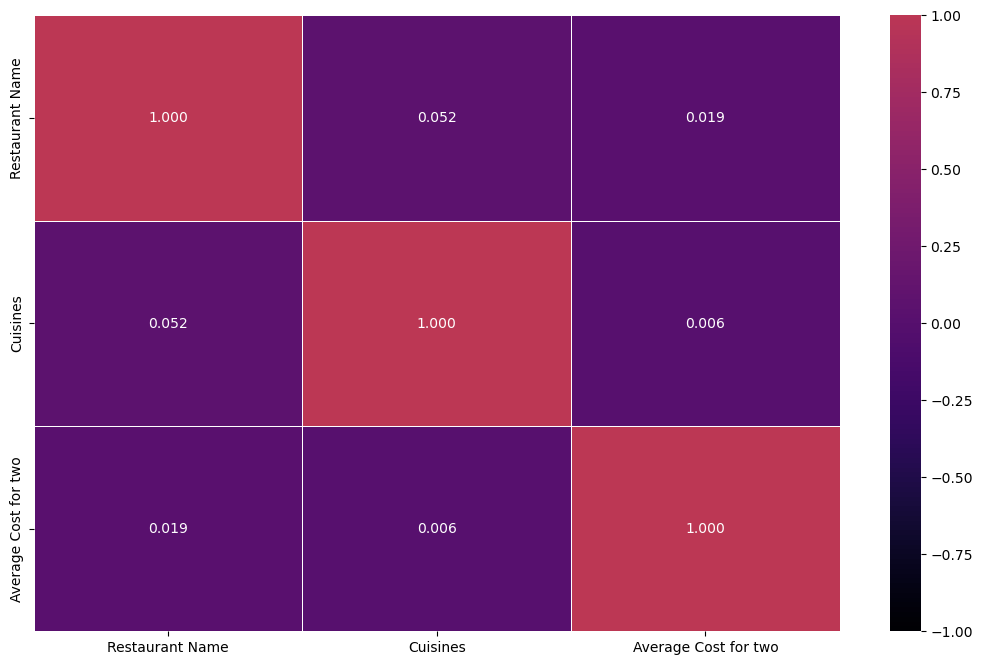

In [21]:
plt.figure(figsize = (13,8))
sns.heatmap(resdf.corr(),
           annot = True,
           linewidth = .5,
           cmap = "inferno",
            vmin=-1,
            center=True,
           fmt='.3f')

### Normalizing data

In [22]:
from scipy.stats import zscore
bankdfscaled = resdf.apply(zscore)
bankdfscaled.head()

,Restaurant Name,Cuisines,Average Cost for two
0,0.043675,-0.134480,-0.006221
1,-0.224995,0.236899,-0.000020
2,-0.353489,1.325758,0.173592
3,0.491302,0.266064,0.018581
4,0.872112,0.258287,0.018581


### Splitting data to Training set and Test set

In [23]:
X = resdf[['Restaurant Name', 'Average Cost for two']] 
Y = resdf['Cuisines']

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10) 

### Implementing Desicion Tree Classifier Algorithm 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score,classification_report,confusion_matrix

model_entropy = DecisionTreeClassifier(criterion='entropy')
DTModel = model_entropy.fit(X_train, Y_train)

In [26]:
TrSDTPred = DTModel.predict(X_train)
TeSDTPred = DTModel.predict(X_test)
TrSAccDT = accuracy_score(Y_train, TrSDTPred)
TeSAccDT = accuracy_score(Y_test, TeSDTPred)
TeSRecDT = recall_score(Y_train, TrSDTPred, average='weighted')
TeSPreDT = precision_score(Y_test, TeSDTPred, average='weighted')

ResultsDf = pd.DataFrame({'Method': ['Desicion Tree'], 'TrainingAccuracy': [TrSAccDT], 'TestAccuracy': TeSAccDT,
                         'TestRecall': TeSRecDT, 'TestPrecision': TeSPreDT})
ResultsDf = ResultsDf[['Method', 'TrainingAccuracy', 'TestAccuracy', 'TestRecall', 'TestPrecision']]
ResultsDf

,Method,TrainingAccuracy,TestAccuracy,TestRecall,TestPrecision
0,Desicion Tree,0.976287,0.239392,0.976287,0.238828
